In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("mergedfile_patient_age_yearsall.txt", sep="\t")

In [3]:
mutation_cols = df.columns[1:12941]     
meta_cols_before = df.columns[:1]     
meta_cols_after = df.columns[12941:]    
new_cols = pd.DataFrame(index=df.index)
for col in mutation_cols:
    parts = col.split(',')
    base = parts[0]      
    alleles = parts[1:]  
    col_numeric = pd.to_numeric(df[col], errors='coerce')
    new_cols[base] = col_numeric.apply(lambda x: 1 if x > 0 else 0)
    for i, allele in enumerate(alleles, start=1):
        allele_col = base[:-1] + allele  # e.g., A1C (remove '*')
        new_cols[allele_col] = col_numeric.apply(lambda x: 1 if x == i else 0)
final_df = pd.concat([df[meta_cols_before], new_cols, df[meta_cols_after]], axis=1)

In [4]:
cols_with_star = [col for col in final_df.columns if '*' in col]
print(cols_with_star[:10])  

['A1*', 'T2*', 'T3*', 'A4*', 'A5*', 'A6*', 'G7*', 'G8*', 'T9*', 'T10*']


In [5]:
final_df

,strain,A1*,A1C,A1G,A1T,T2*,T2G,T2K,T2A,T2C,...,A29891*,A29891G,A29892*,A29892G,"A29895*,C",Location,Gender,Patient age,Additional host information,Lineage
0,hCoV-19/Turkey/TSIM_Ankara_140111_978/2024,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Europe / Turkey,Male,87.00,Severe,B
1,hCoV-19/Slovakia/ruvzbb_24_02_00000120/2024,0,0,0,0,1,1,0,0,0,...,1,1,1,1,1,Europe / Slovakia / Okres Presov,Female,91.00,Severe,B.1.1.529
2,hCoV-19/Brazil/RJ-FIOCRUZ-51/2024,0,0,0,0,1,1,0,0,0,...,1,1,1,1,1,South America / Brazil / Rio de Janeiro / Rio ...,Male,35.00,Severe,BA.1
3,hCoV-19/Fujian/FCDC-FZ9970725/2024,0,0,0,0,1,1,0,0,0,...,1,1,1,1,1,Asia / China / Fujian,Male,70.00,Severe,EG.5.1.1
4,hCoV-19/Fujian/FCDC-XM010309HG/2024,0,0,0,0,1,1,0,0,0,...,1,1,1,1,1,Asia / China / Fujian,Female,19.00,Severe,HK.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13972,hCoV-19/Spain/CT-LabRefCat-9317885r/2024,0,0,0,0,1,1,0,0,0,...,1,1,1,1,1,Europe / Spain / Catalunya / Mataro,Male,94.00,Severe,JN.1.4 (consensus call)
13973,hCoV-19/Spain/CT-LabRefCat-6385185r/2024,0,0,0,0,1,1,0,0,0,...,1,1,1,1,1,Europe / Spain / Catalunya / Mataro,Female,81.00,Severe,KP.3.1.1 (consensus call)
13974,hCoV-19/USA/NY-WMC-6178/2024,0,0,0,0,1,1,0,0,0,...,1,1,1,1,1,North America / USA / New York / Westchester C...,Male,0.42,Severe,JN.1.4 (consensus call)
13975,hCoV-19/Mexico/GUA_CIAD_01001002/2024,0,0,0,0,1,1,0,0,0,...,1,1,1,1,1,North America / Mexico / Guanajuato,Female,26.00,Severe,XBB.1.16.15


In [6]:
final_df = final_df.drop(columns=cols_with_star)

In [7]:
final_df

,strain,A1C,A1G,A1T,T2G,T2K,T2A,T2C,T3C,T3A,...,A29875G,A29876G,A29877T,A29891G,A29892G,Location,Gender,Patient age,Additional host information,Lineage
0,hCoV-19/Turkey/TSIM_Ankara_140111_978/2024,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Europe / Turkey,Male,87.00,Severe,B
1,hCoV-19/Slovakia/ruvzbb_24_02_00000120/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,1,1,Europe / Slovakia / Okres Presov,Female,91.00,Severe,B.1.1.529
2,hCoV-19/Brazil/RJ-FIOCRUZ-51/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,1,1,South America / Brazil / Rio de Janeiro / Rio ...,Male,35.00,Severe,BA.1
3,hCoV-19/Fujian/FCDC-FZ9970725/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,1,1,Asia / China / Fujian,Male,70.00,Severe,EG.5.1.1
4,hCoV-19/Fujian/FCDC-XM010309HG/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,1,1,Asia / China / Fujian,Female,19.00,Severe,HK.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13972,hCoV-19/Spain/CT-LabRefCat-9317885r/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,1,1,Europe / Spain / Catalunya / Mataro,Male,94.00,Severe,JN.1.4 (consensus call)
13973,hCoV-19/Spain/CT-LabRefCat-6385185r/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,1,1,Europe / Spain / Catalunya / Mataro,Female,81.00,Severe,KP.3.1.1 (consensus call)
13974,hCoV-19/USA/NY-WMC-6178/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,1,1,North America / USA / New York / Westchester C...,Male,0.42,Severe,JN.1.4 (consensus call)
13975,hCoV-19/Mexico/GUA_CIAD_01001002/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,1,1,North America / Mexico / Guanajuato,Female,26.00,Severe,XBB.1.16.15


In [8]:
final_df.drop(columns=['Location', 'Lineage', 'Additional host information'], inplace=True)

In [9]:
metadatatwo = pd.read_csv("metadata2.txt", sep="\t")
finalfile = pd.merge(final_df, metadatatwo, on="strain")

In [10]:
finalfile

,strain,A1C,A1G,A1T,T2G,T2K,T2A,T2C,T3C,T3A,...,A29877T,A29891G,A29892G,Gender,Patient age,clade,Nextclade_pango,region,country,category
0,hCoV-19/Turkey/TSIM_Ankara_140111_978/2024,0,0,0,0,0,0,0,0,0,...,0,0,0,Male,87.00,19A,B,Europe,Turkey,Severe
1,hCoV-19/Slovakia/ruvzbb_24_02_00000120/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Female,91.00,recombinant,XCU,Europe,Slovakia,Severe
2,hCoV-19/Brazil/RJ-FIOCRUZ-51/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Male,35.00,21K,BA.1,South America,Brazil,Severe
3,hCoV-19/Fujian/FCDC-FZ9970725/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Male,70.00,23F,EG.5.1.1,Asia,China,Severe
4,hCoV-19/Fujian/FCDC-XM010309HG/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Female,19.00,23H,HK.3,Asia,China,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13972,hCoV-19/Spain/CT-LabRefCat-9317885r/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Male,94.00,24A,JN.1.4.9,Europe,Spain,Severe
13973,hCoV-19/Spain/CT-LabRefCat-6385185r/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Female,81.00,24E,KP.3.1.1,Europe,Spain,Severe
13974,hCoV-19/USA/NY-WMC-6178/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Male,0.42,24A,JN.1.4,North America,USA,Severe
13975,hCoV-19/Mexico/GUA_CIAD_01001002/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Female,26.00,23B,XBB.1.16.15,North America,Mexico,Severe


In [11]:
finalfile['Gender'] = finalfile['Gender'].replace('Hombre', 'Male') 
finalfile['Gender'] = finalfile['Gender'].replace('Mujer', 'Female')
finalfile['Gender'] = finalfile['Gender'].replace('Malex', 'Female')
finalfile['Gender'] = finalfile['Gender'].replace('Famale', 'Female')

In [12]:
finalfile['Gender'].value_counts()

Gender
Female    7856
Male      6121
Name: count, dtype: int64

In [13]:
final_df=finalfile

In [14]:
final_df

,strain,A1C,A1G,A1T,T2G,T2K,T2A,T2C,T3C,T3A,...,A29877T,A29891G,A29892G,Gender,Patient age,clade,Nextclade_pango,region,country,category
0,hCoV-19/Turkey/TSIM_Ankara_140111_978/2024,0,0,0,0,0,0,0,0,0,...,0,0,0,Male,87.00,19A,B,Europe,Turkey,Severe
1,hCoV-19/Slovakia/ruvzbb_24_02_00000120/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Female,91.00,recombinant,XCU,Europe,Slovakia,Severe
2,hCoV-19/Brazil/RJ-FIOCRUZ-51/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Male,35.00,21K,BA.1,South America,Brazil,Severe
3,hCoV-19/Fujian/FCDC-FZ9970725/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Male,70.00,23F,EG.5.1.1,Asia,China,Severe
4,hCoV-19/Fujian/FCDC-XM010309HG/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Female,19.00,23H,HK.3,Asia,China,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13972,hCoV-19/Spain/CT-LabRefCat-9317885r/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Male,94.00,24A,JN.1.4.9,Europe,Spain,Severe
13973,hCoV-19/Spain/CT-LabRefCat-6385185r/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Female,81.00,24E,KP.3.1.1,Europe,Spain,Severe
13974,hCoV-19/USA/NY-WMC-6178/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Male,0.42,24A,JN.1.4,North America,USA,Severe
13975,hCoV-19/Mexico/GUA_CIAD_01001002/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Female,26.00,23B,XBB.1.16.15,North America,Mexico,Severe


In [15]:
final_df['category'] = pd.get_dummies(final_df['category'])['Severe'].astype(int)
print(final_df['category'].head())

0    1
1    1
2    1
3    1
4    1
Name: category, dtype: int32


In [16]:
final_df['Gender'] = pd.get_dummies(final_df['Gender'])['Female'].astype(int)
print(final_df['Gender'].head())

0    0
1    1
2    0
3    0
4    1
Name: Gender, dtype: int32


In [17]:
clade_dummies = pd.get_dummies(final_df['clade'], prefix='clade').astype(int)
final_df = pd.concat([final_df, clade_dummies], axis=1)

In [18]:
final_df = final_df.drop(['clade', 'clade_24C'], axis = 1)

In [19]:
Nextclade_dummies = pd.get_dummies(final_df['Nextclade_pango'], prefix='Nextclade_pango').astype(int)
final_df = pd.concat([final_df, Nextclade_dummies], axis=1)

In [20]:
final_df = final_df.drop(['Nextclade_pango', 'Nextclade_pango_XEN'], axis = 1)

In [21]:
first_col = final_df.iloc[:, [0]]
first_col

,strain
0,hCoV-19/Turkey/TSIM_Ankara_140111_978/2024
1,hCoV-19/Slovakia/ruvzbb_24_02_00000120/2024
2,hCoV-19/Brazil/RJ-FIOCRUZ-51/2024
3,hCoV-19/Fujian/FCDC-FZ9970725/2024
4,hCoV-19/Fujian/FCDC-XM010309HG/2024
...,...
13972,hCoV-19/Spain/CT-LabRefCat-9317885r/2024
13973,hCoV-19/Spain/CT-LabRefCat-6385185r/2024
13974,hCoV-19/USA/NY-WMC-6178/2024
13975,hCoV-19/Mexico/GUA_CIAD_01001002/2024


In [22]:
rest = final_df.iloc[:, 1:]
rest

,A1C,A1G,A1T,T2G,T2K,T2A,T2C,T3C,T3A,A4T,...,Nextclade_pango_XEL.3,Nextclade_pango_XEP,Nextclade_pango_XEU,Nextclade_pango_XEV,Nextclade_pango_XEW,Nextclade_pango_XFB,Nextclade_pango_XFC,Nextclade_pango_XFG,Nextclade_pango_XFJ,Nextclade_pango_XFL
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13972,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
13973,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
13974,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
13975,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from sklearn.preprocessing import LabelEncoder

le_country = LabelEncoder()
final_df['country_encoded'] = le_country.fit_transform(final_df['country'])

le_region = LabelEncoder()
final_df['region_encoded'] = le_region.fit_transform(final_df['region'])

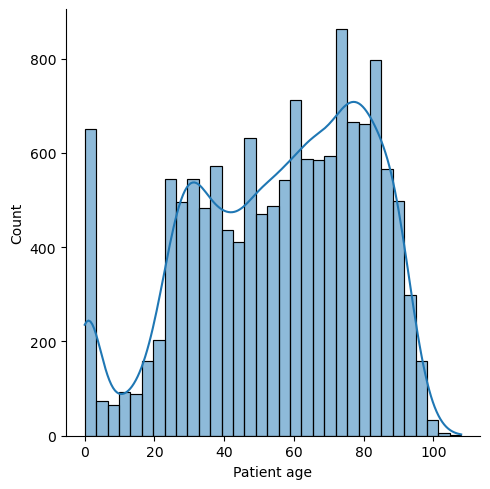

In [24]:
sns.displot(final_df["Patient age"], kde=True)
plt.show()

In [25]:
group_data = final_df[['country_encoded', 'region_encoded']].values


In [26]:
fixed_effects = final_df.drop(columns=['strain','category', 'country_encoded', 'region_encoded', 'country', 'region'])  # All predictors
random_effects = final_df[['country', 'region']]
target = final_df['category']

In [27]:
X_train, X_test, y_train, y_test, group_train, group_test = train_test_split(
    fixed_effects, target, group_data, test_size=0.2, random_state=42
)

In [28]:
X_train["Patient age"].min(), X_train["Patient age"].max(), X_train["Patient age"].mean(), X_train["Patient age"].std()

(0.0, 103.0, 55.55121813791252, 24.976544745874232)

In [29]:
X_test["Patient age"].min(), X_test["Patient age"].max(), X_test["Patient age"].mean(), X_test["Patient age"].std()

(0.04, 108.0, 55.62713519313305, 24.82169200029981)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[["Patient age"]] = scaler.fit_transform(X_train[["Patient age"]])
X_test[["Patient age"]] = scaler.transform(X_test[["Patient age"]])


In [31]:
pd.DataFrame(X_train).head()

,A1C,A1G,A1T,T2G,T2K,T2A,T2C,T3C,T3A,A4T,...,Nextclade_pango_XEL.3,Nextclade_pango_XEP,Nextclade_pango_XEU,Nextclade_pango_XEV,Nextclade_pango_XEW,Nextclade_pango_XFB,Nextclade_pango_XFC,Nextclade_pango_XFG,Nextclade_pango_XFJ,Nextclade_pango_XFL
13935,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3065,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
12997,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
13399,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7752,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [32]:
pd.DataFrame(X_test).head()

,A1C,A1G,A1T,T2G,T2K,T2A,T2C,T3C,T3A,A4T,...,Nextclade_pango_XEL.3,Nextclade_pango_XEP,Nextclade_pango_XEU,Nextclade_pango_XEV,Nextclade_pango_XEW,Nextclade_pango_XFB,Nextclade_pango_XFC,Nextclade_pango_XFG,Nextclade_pango_XFJ,Nextclade_pango_XFL
2629,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8370,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
11219,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9619,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3678,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
X_train["Patient age"].min(), X_train["Patient age"].max(), X_train["Patient age"].mean(), X_train["Patient age"].std()

(-2.2242348991472745,
 1.8998185832338077,
 3.7144461949000856e-16,
 1.0000447217191275)

In [34]:
X_test["Patient age"].min(), X_test["Patient age"].max(), X_test["Patient age"].mean(), X_test["Patient age"].std()

(-2.2226333249793595,
 2.1000153542231805,
 0.003039669863634253,
 0.9938445177905502)

In [35]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(11181, 17066)
(2796, 17066)
(11181,)
(2796,)


In [36]:
X_test.to_csv("x_test.txt", sep='\t', index=False)

In [37]:
X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values
y_test_np = y_test.values
group_train_np = group_train
group_test_np = group_test

In [38]:
import numpy as np

np.save("y_test.npy", y_test_np)


In [39]:
pip install gpboost


In [40]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)


auc_scores = []

for train_index, val_index in kf.split(X_train_np):
    X_train_cv, X_val_cv = X_train_np[train_index], X_train_np[val_index]
    y_train_cv, y_val_cv = y_train_np[train_index], y_train_np[val_index]
    group_train_cv = group_train_np[train_index]
   

In [41]:
import gpboost as gpb
gp_model = gpb.GPModel(group_data=group_train_cv, likelihood="gaussian")
train_data = gpb.Dataset(data=X_train_cv, label=y_train_cv)
params = {
    'objective': 'binary',
    'n_estimators': 564,
    'learning_rate': 0.014951498272501501,
    'max_depth': 24,
    'num_leaves': 34
}
model = gpb.train(params=params,
                  train_set=train_data,
                  gp_model=gp_model,
                  num_boost_round=1000)

[GPBoost] [Warning] The 'objective' (='binary') for boosting and the 'likelihood' (='gaussian') for the GPModel do not match. It is assumed that the 'objective' for boosting is correctly specified, and the likelihood of the GPModel is changed accordingly. This can be problematic if the GPModel has been pre-trained 
[GPBoost] [Info] Total Bins 32687
[GPBoost] [Info] Number of data points in the train set: 8945, number of used features: 16284
[GPBoost] [Info] [GPBoost with bernoulli_probit likelihood]: initscore=2.041122
[GPBoost] [Info] Start training from score 2.041122


In [42]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
preds = model.predict(data=X_test_np, group_data_pred=group_test_np)





In [43]:
print("Prediction output type:", type(preds))

Prediction output type: <class 'dict'>


In [44]:
preds

{'fixed_effect': None,
 'random_effect_mean': None,
 'random_effect_cov': None,
 'response_mean': array([0.18092498, 0.23025468, 0.99964937, ..., 0.56449868, 0.76992778,
        0.33198277]),
 'response_var': None}

In [45]:
import numpy as np
np.save('gpboostmixed_probs.npy', preds['response_mean'])


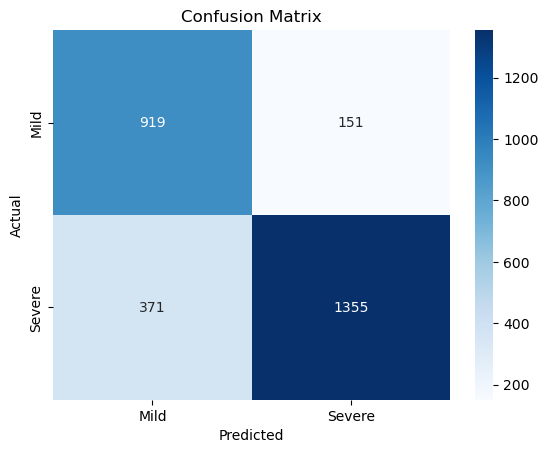


Classification Report:

              precision    recall  f1-score   support

        Mild       0.71      0.86      0.78      1070
      Severe       0.90      0.79      0.84      1726

    accuracy                           0.81      2796
   macro avg       0.81      0.82      0.81      2796
weighted avg       0.83      0.81      0.82      2796

fpr = [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0

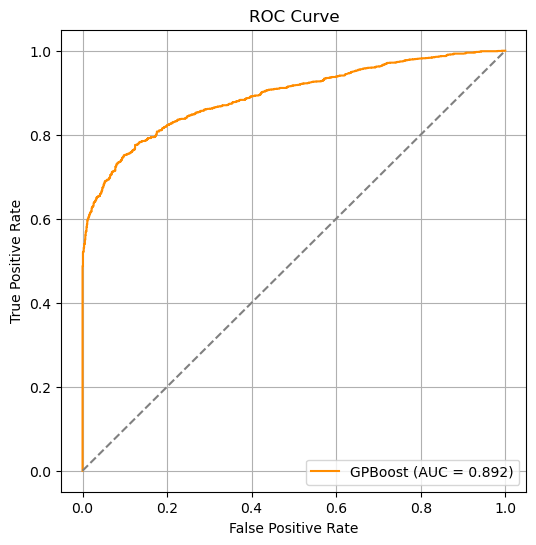

In [46]:
if isinstance(preds, dict):
    if 'response_mean' in preds:
        y_pred_prob = preds['response_mean']
    else:
        raise KeyError(f"'response_mean' key not found in prediction dict. Keys available: {list(preds.keys())}")
else:
    y_pred_prob = preds

y_pred = (y_pred_prob >= 0.5).astype(int)

cm = confusion_matrix(y_test_np, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Mild', 'Severe'], yticklabels=['Mild', 'Severe'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test_np, y_pred, target_names=["Mild", "Severe"]))

fpr, tpr, thresholds = roc_curve(y_test_np, y_pred_prob)
auc_score = roc_auc_score(y_test_np, y_pred_prob)
print('fpr =', fpr)
print('tpr =', tpr)
print('thresholds =', thresholds)
print(f"AUC = {auc_score:.3f}")
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"GPBoost (AUC = {auc_score:.3f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random guess)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [47]:
y_pred_series = pd.Series(y_pred, index=X_test.index, name="y_pred")
y_test_series = pd.Series(y_test_np, index=X_test.index, name="y_test")
merged_df_TEST = pd.concat([X_test, y_pred_series, y_test_series], axis=1)
merged_df_TEST.to_csv("X_test_with_predictions.tsv", sep='\t', index=False)


In [48]:
correct_positive_df = merged_df_TEST[(merged_df_TEST['y_pred'] == 1) & (merged_df_TEST['y_test'] == 1)]
correct_positive_df

,A1C,A1G,A1T,T2G,T2K,T2A,T2C,T3C,T3A,A4T,...,Nextclade_pango_XEU,Nextclade_pango_XEV,Nextclade_pango_XEW,Nextclade_pango_XFB,Nextclade_pango_XFC,Nextclade_pango_XFG,Nextclade_pango_XFJ,Nextclade_pango_XFL,y_pred,y_test
11219,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
9619,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
5584,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
6942,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
8625,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10144,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
8025,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
6749,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
8649,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1


In [49]:
correct_positive_df.to_csv("X_test_with_correctpredictions.tsv", sep='\t', index=True)

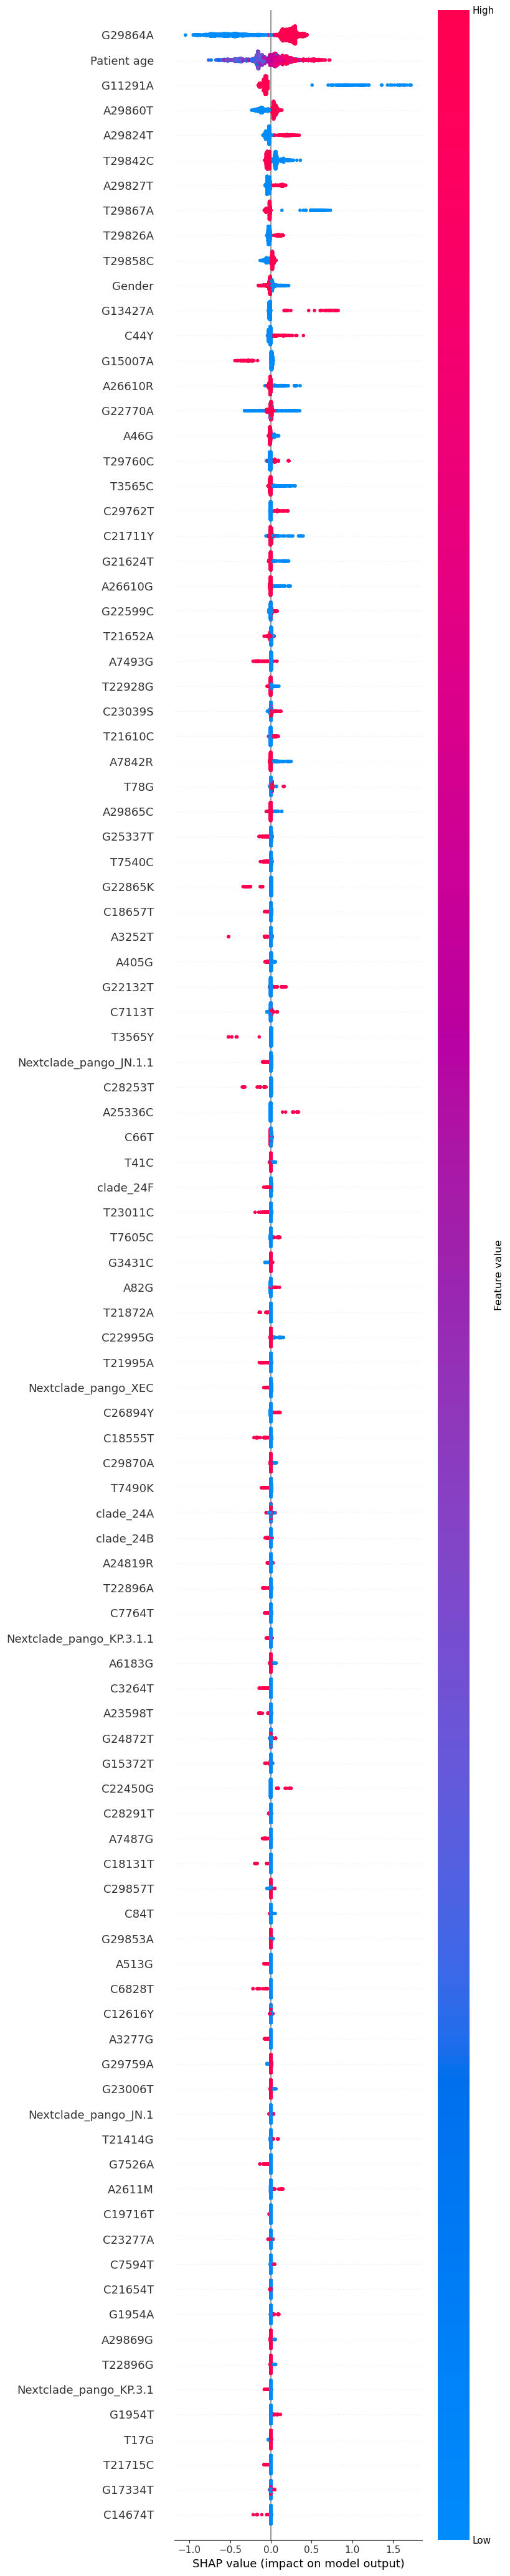

In [50]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_np)
shap.summary_plot(shap_values, X_test_np, feature_names=X_test.columns, max_display=100)


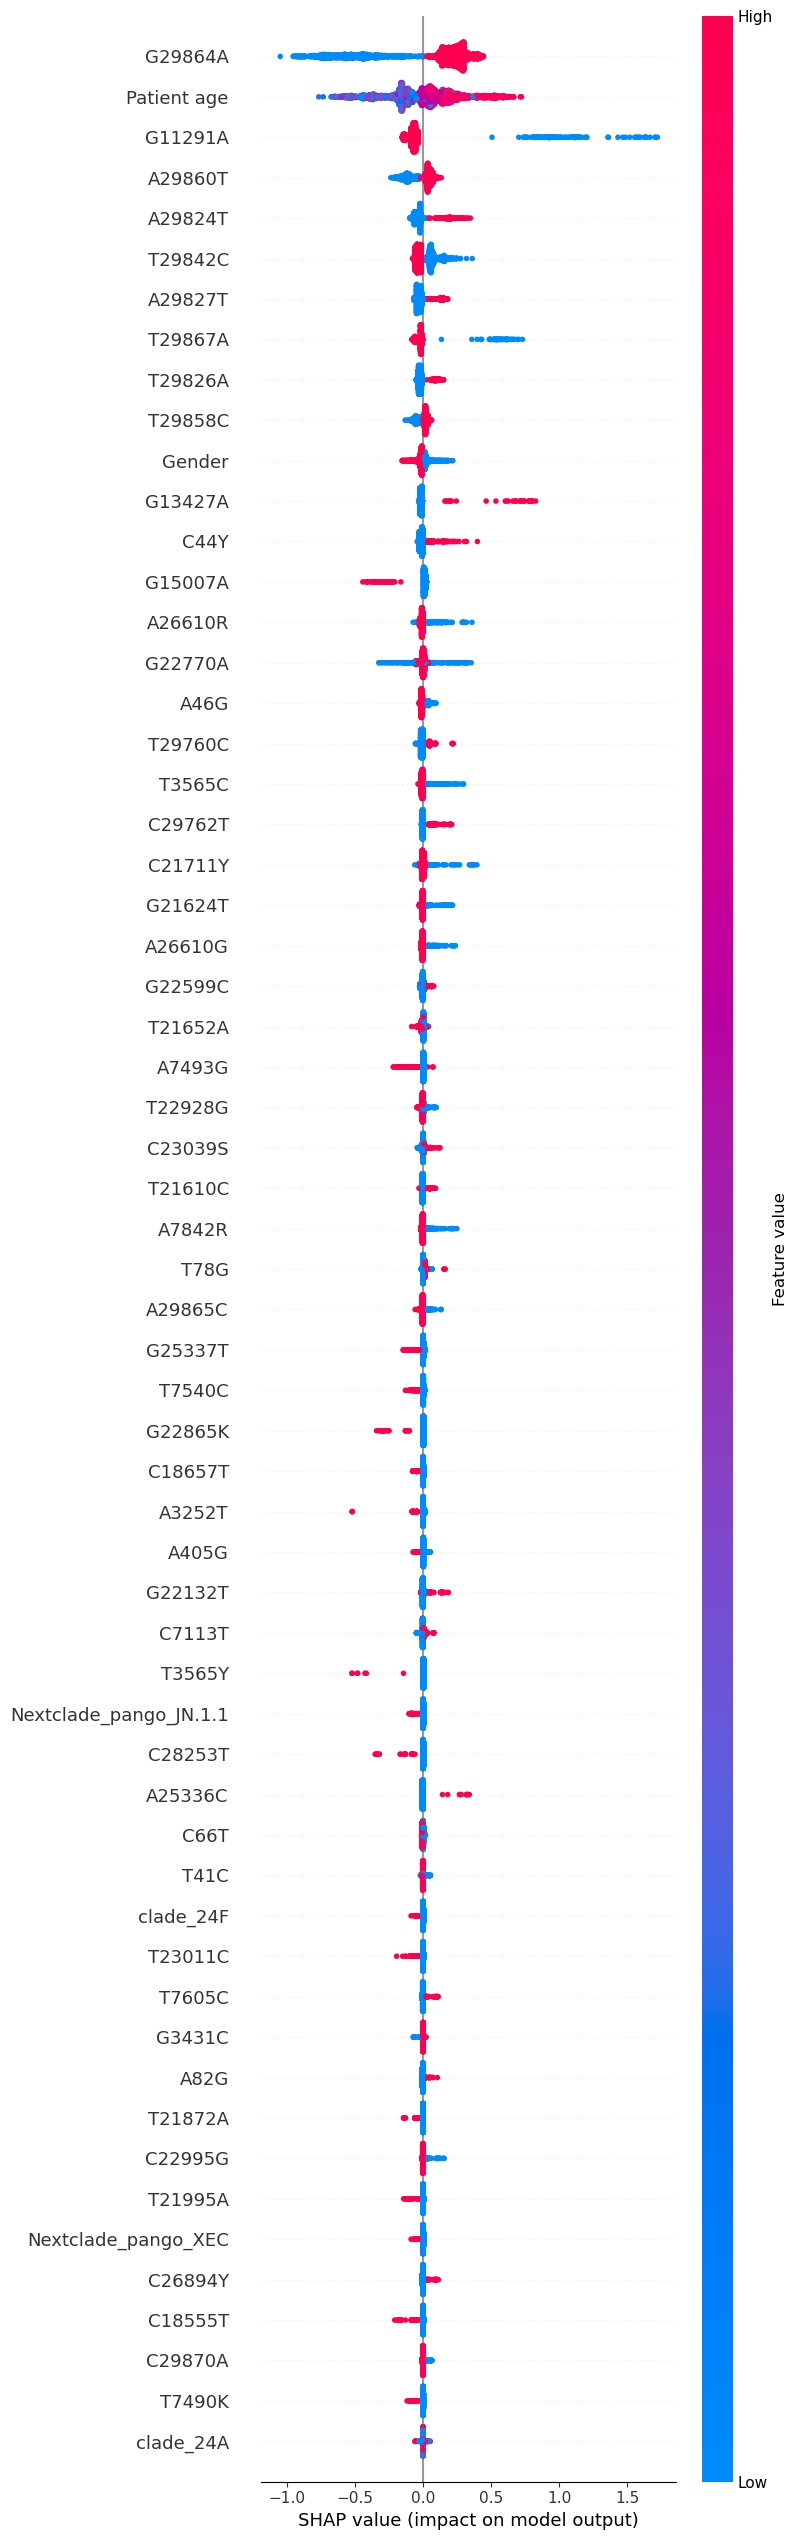

In [51]:
plt.figure()
shap.summary_plot(shap_values, X_test_np, feature_names=X_test.columns, max_display=60, show=False)
plt.savefig("shap_summary_beeswarm.tiff", format='tiff', dpi=600, bbox_inches='tight')
plt.show()


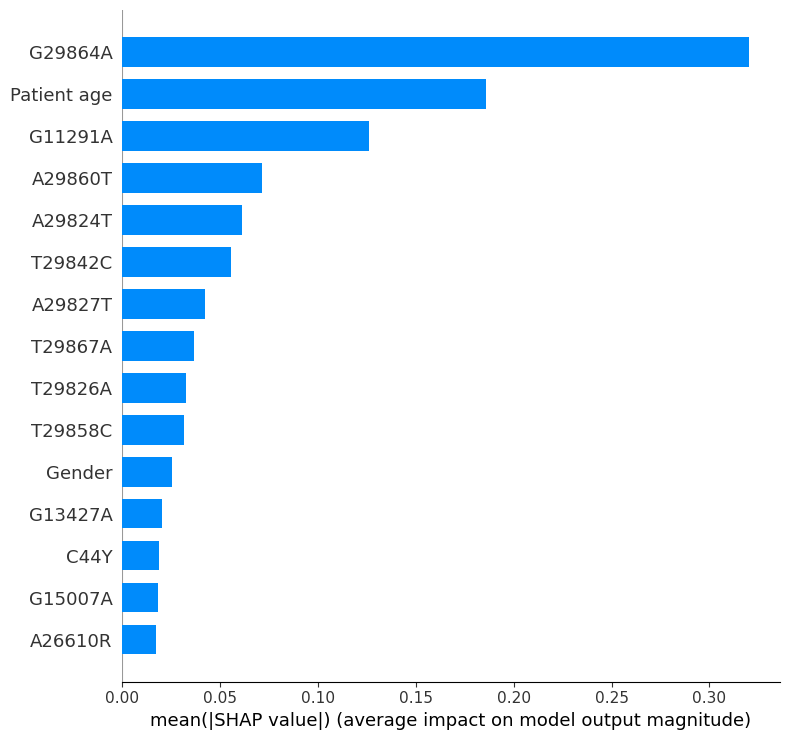

In [52]:
import matplotlib.pyplot as plt
plt.figure()
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=15, show=False)
plt.savefig("shap_summary_plot.tiff", format='tiff', dpi=600, bbox_inches='tight')
plt.show()

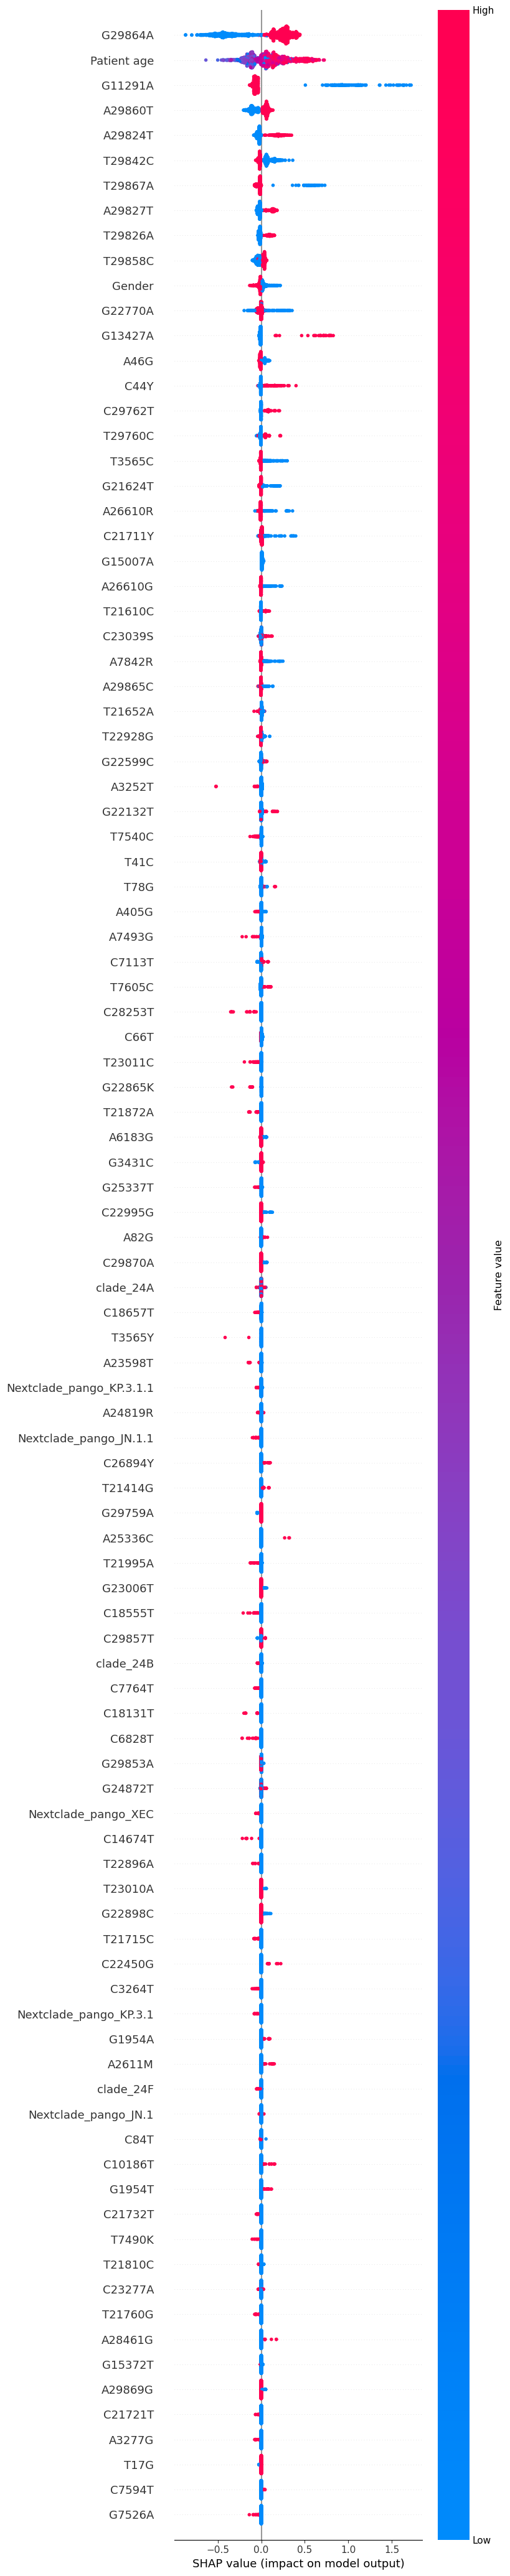

In [54]:
X_severe = X_test[y_pred == 1]
shap_values_severe = explainer(X_severe)
shap.summary_plot(shap_values_severe, X_severe, max_display=100)

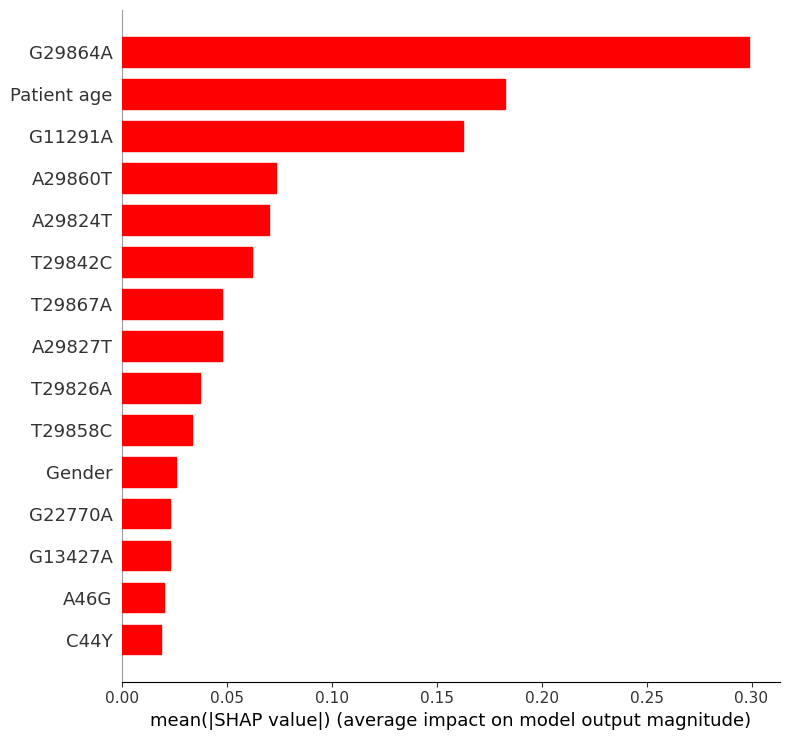

In [55]:
plt.figure()
shap.summary_plot(shap_values_severe, X_severe, plot_type="bar", max_display=15, show=False)
ax = plt.gca()
for bar in ax.patches:
    bar.set_color('red')
plt.savefig("shap_summary_severe.tiff", format='tiff', dpi=600, bbox_inches='tight')
plt.show()

In [56]:
mean_abs_shap = np.abs(shap_values_severe.values).mean(axis=0)
feature_importance = pd.DataFrame({
    'feature': X_severe.columns,
    'mean_abs_shap_value': mean_abs_shap
})
feature_importance_sorted = feature_importance.sort_values(by='mean_abs_shap_value', ascending=False)
feature_importance_sorted.to_csv("shap_feature_importance_severe_GPBoost_mixedeffects.tsv", sep='\t', index=False)

In [57]:
X_severe_correct = X_test[(y_pred == 1) & (y_test == 1)]


In [58]:
X_severe_correct_subset = X_severe_correct.iloc[:, 12000:]
X_severe_correct_subset.index = range(1, len(X_severe_correct_subset) + 1)
X_severe_correct_subset.to_csv("X_severe_correct_subset.tsv", sep="\t", index=True)


In [59]:
shap_values_severe_correct = explainer(X_severe_correct)

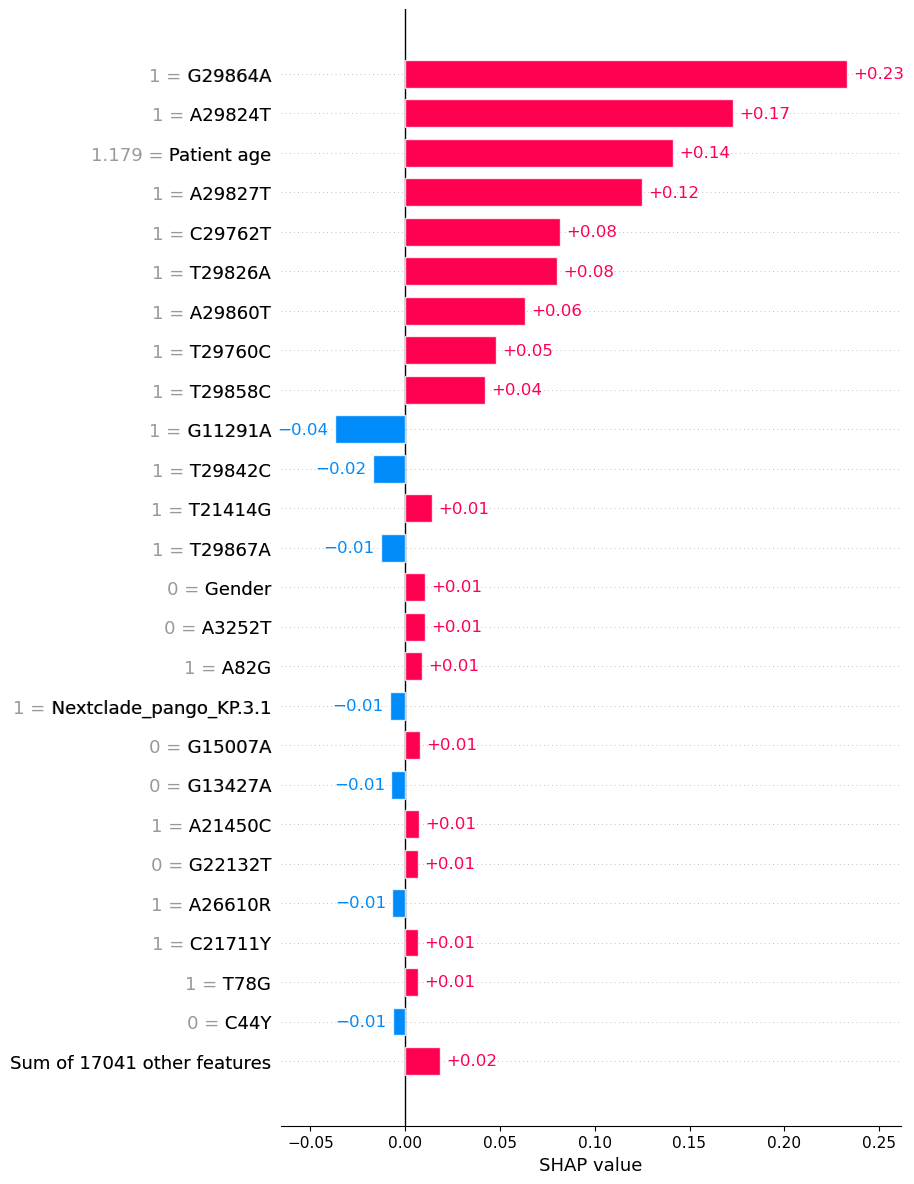

In [60]:
shap.plots.bar(shap_values_severe_correct[997], max_display=26) #AGE 85 MALE 24e CLADE k.p.3.1

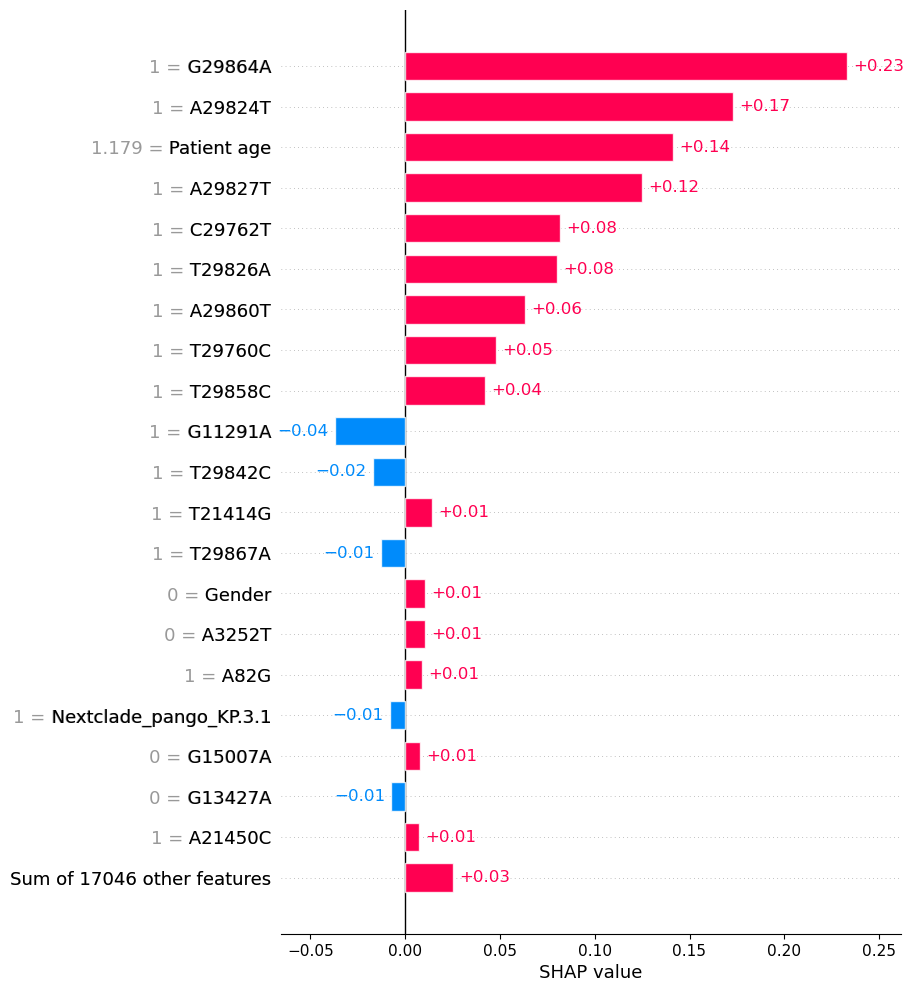

In [61]:
shap.plots.bar(shap_values_severe_correct[997], max_display=21, show=False) #66 male
plt.savefig("shap_bar_sample_997final.tiff", format='tiff', dpi=600, bbox_inches='tight')
plt.show()

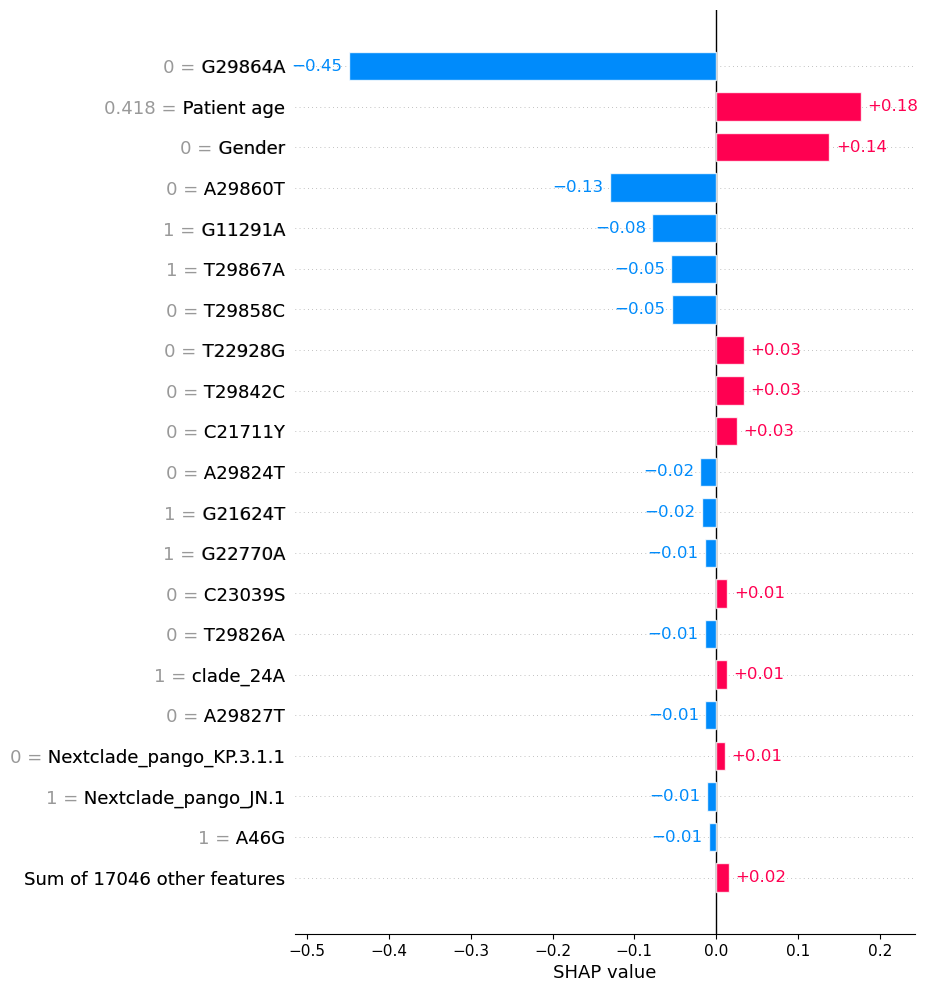

In [62]:
shap.plots.bar(shap_values_severe_correct[41], max_display=21, show=False) #66 male
plt.savefig("shap_bar_sample_41final.tiff", format='tiff', dpi=600, bbox_inches='tight')
plt.show()

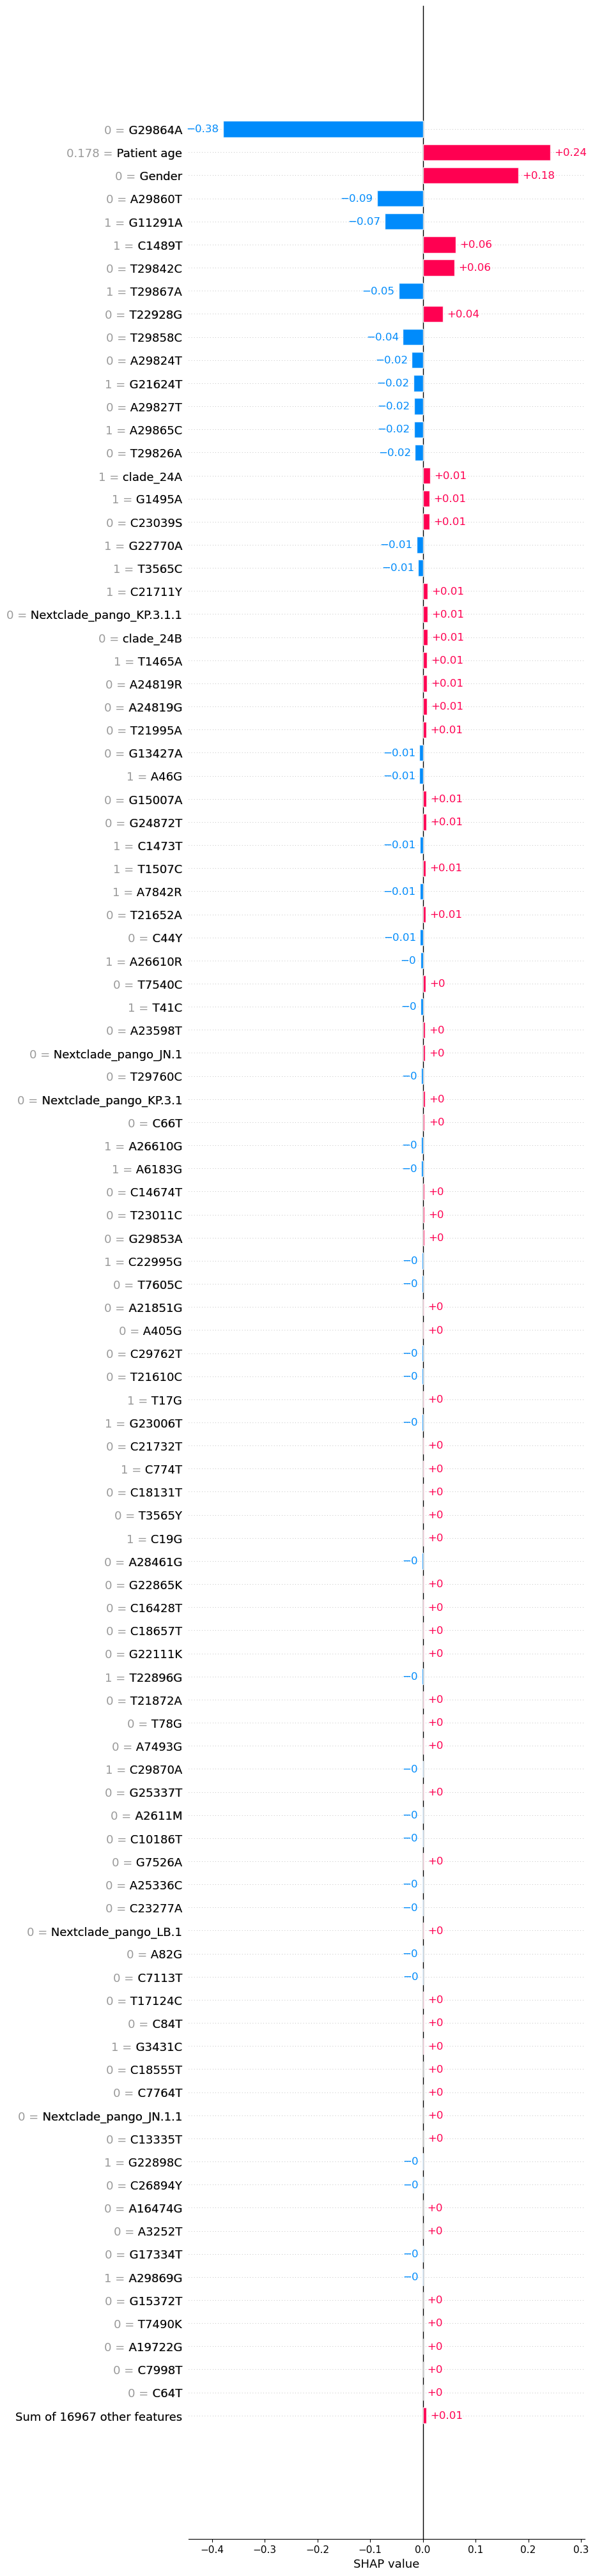

In [63]:
shap.plots.bar(shap_values_severe_correct[50], max_display=100) 

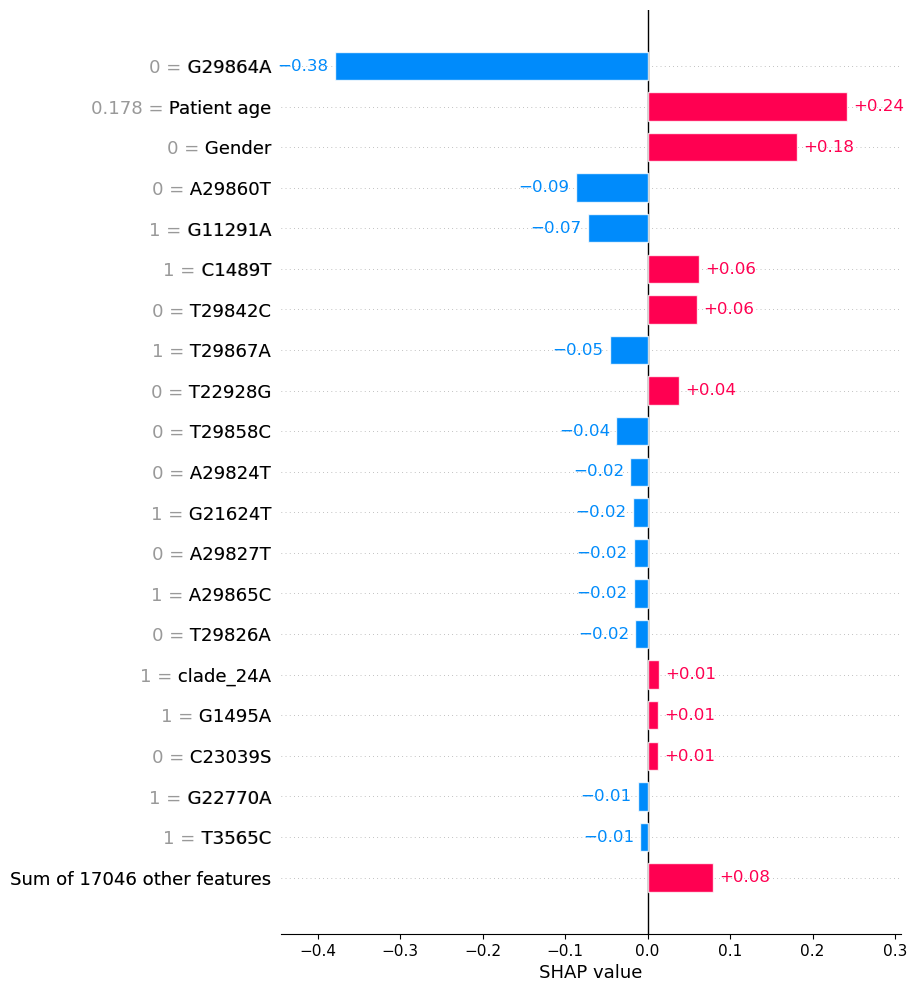

In [64]:
shap.plots.bar(shap_values_severe_correct[50], max_display=21, show=False) #male 60 yrs clade 24A
plt.savefig("shap_bar_sample_50final.tiff", format='tiff', dpi=600, bbox_inches='tight')
plt.show()

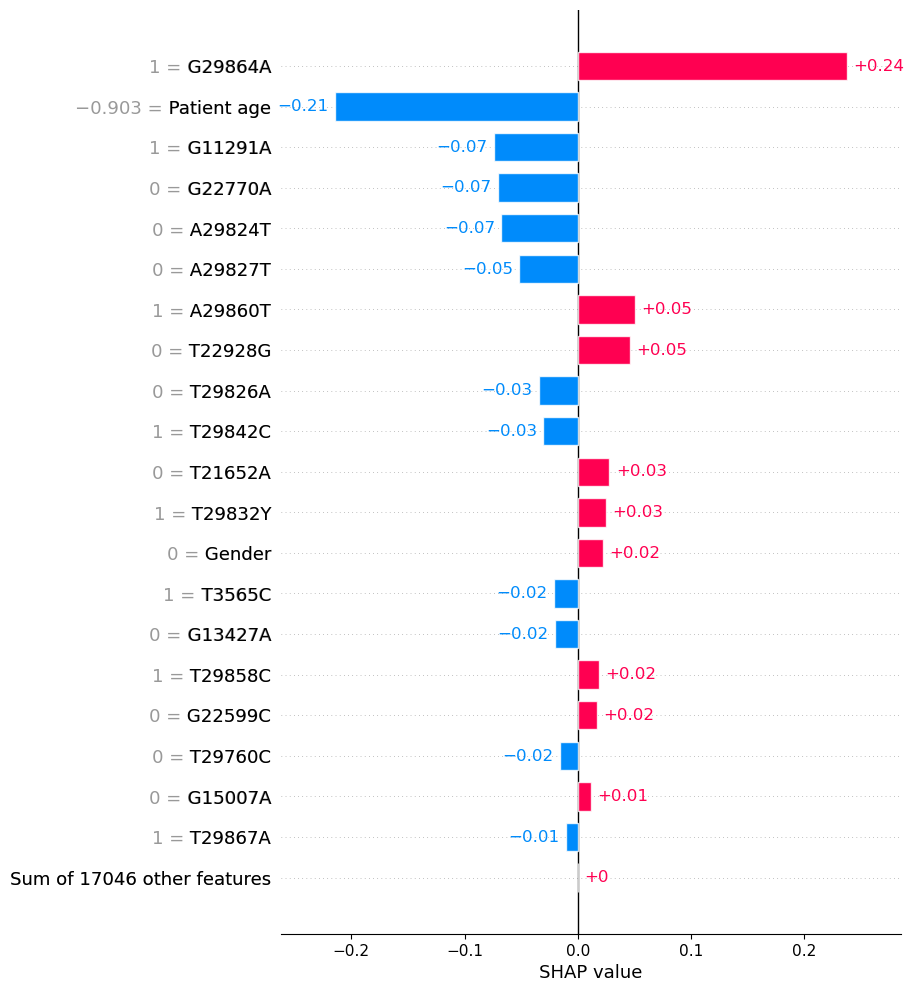

In [65]:
shap.plots.bar(shap_values_severe_correct[1352], max_display=21, show=False) #Male 33
plt.savefig("shap_bar_sample_1352final.tiff", format='tiff', dpi=600, bbox_inches='tight') 
plt.show()

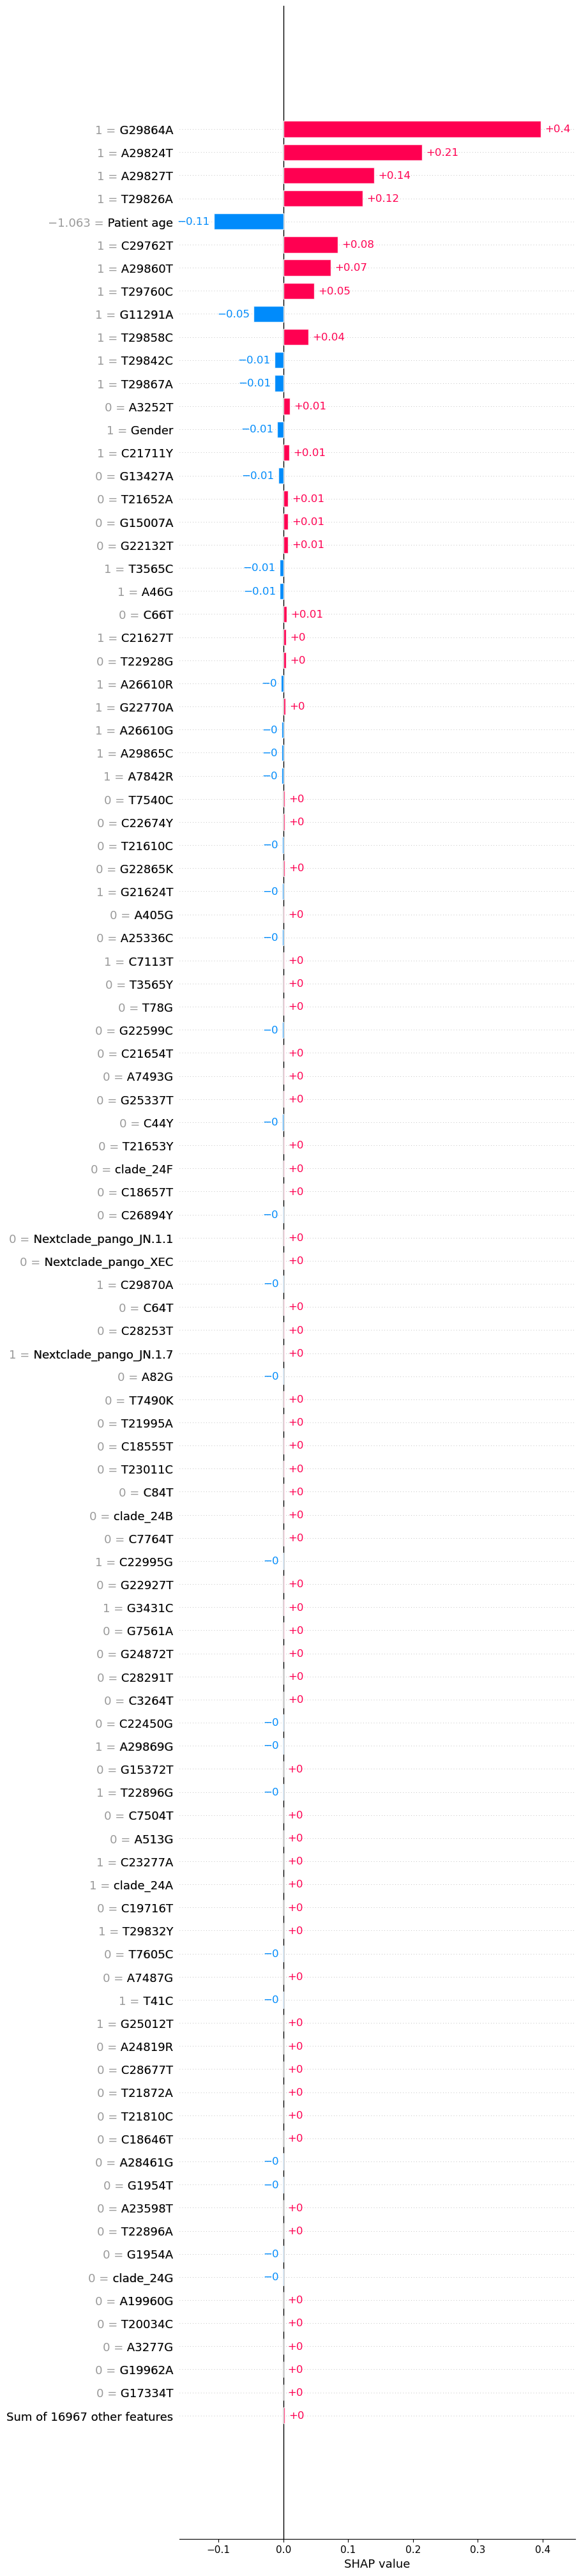

In [66]:
shap.plots.bar(shap_values_severe_correct[1001], max_display=100) #Female 29 yrs

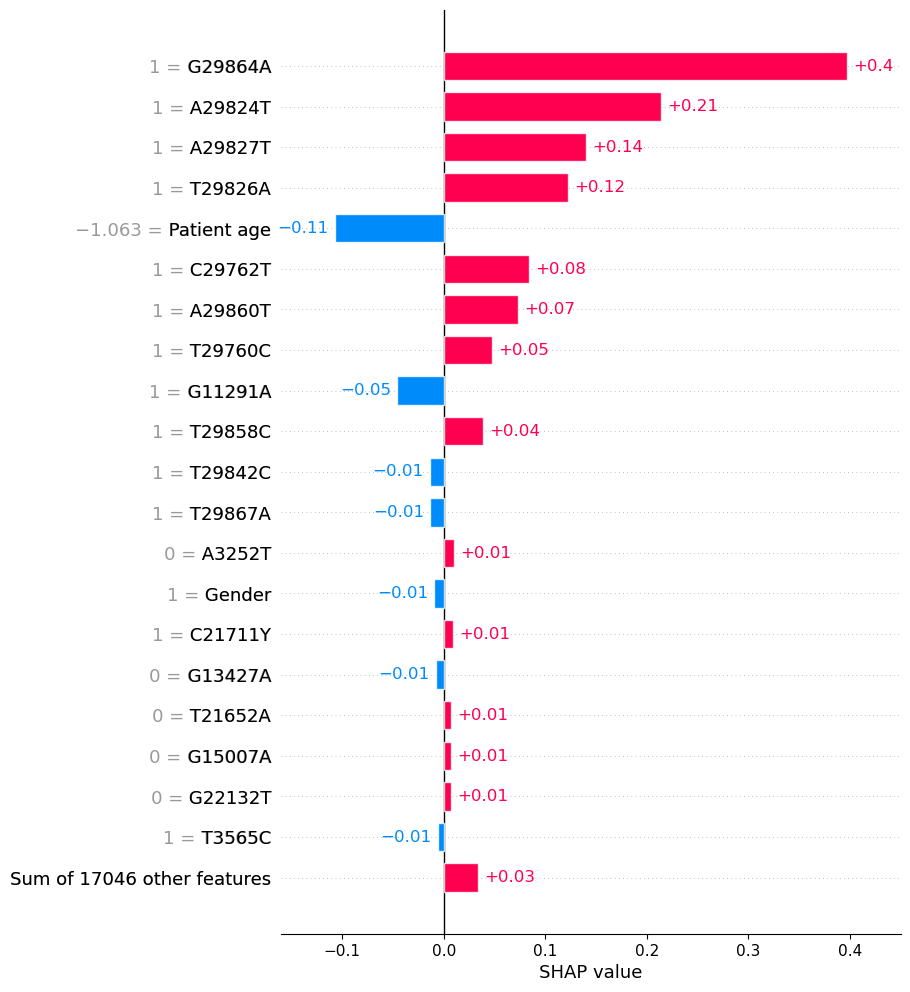

In [67]:
shap.plots.bar(shap_values_severe_correct[1001], max_display=21, show=False)
plt.savefig("shap_bar_sample_1001final.tiff", format='tiff', dpi=600, bbox_inches='tight') #FEMALE 29
plt.show()

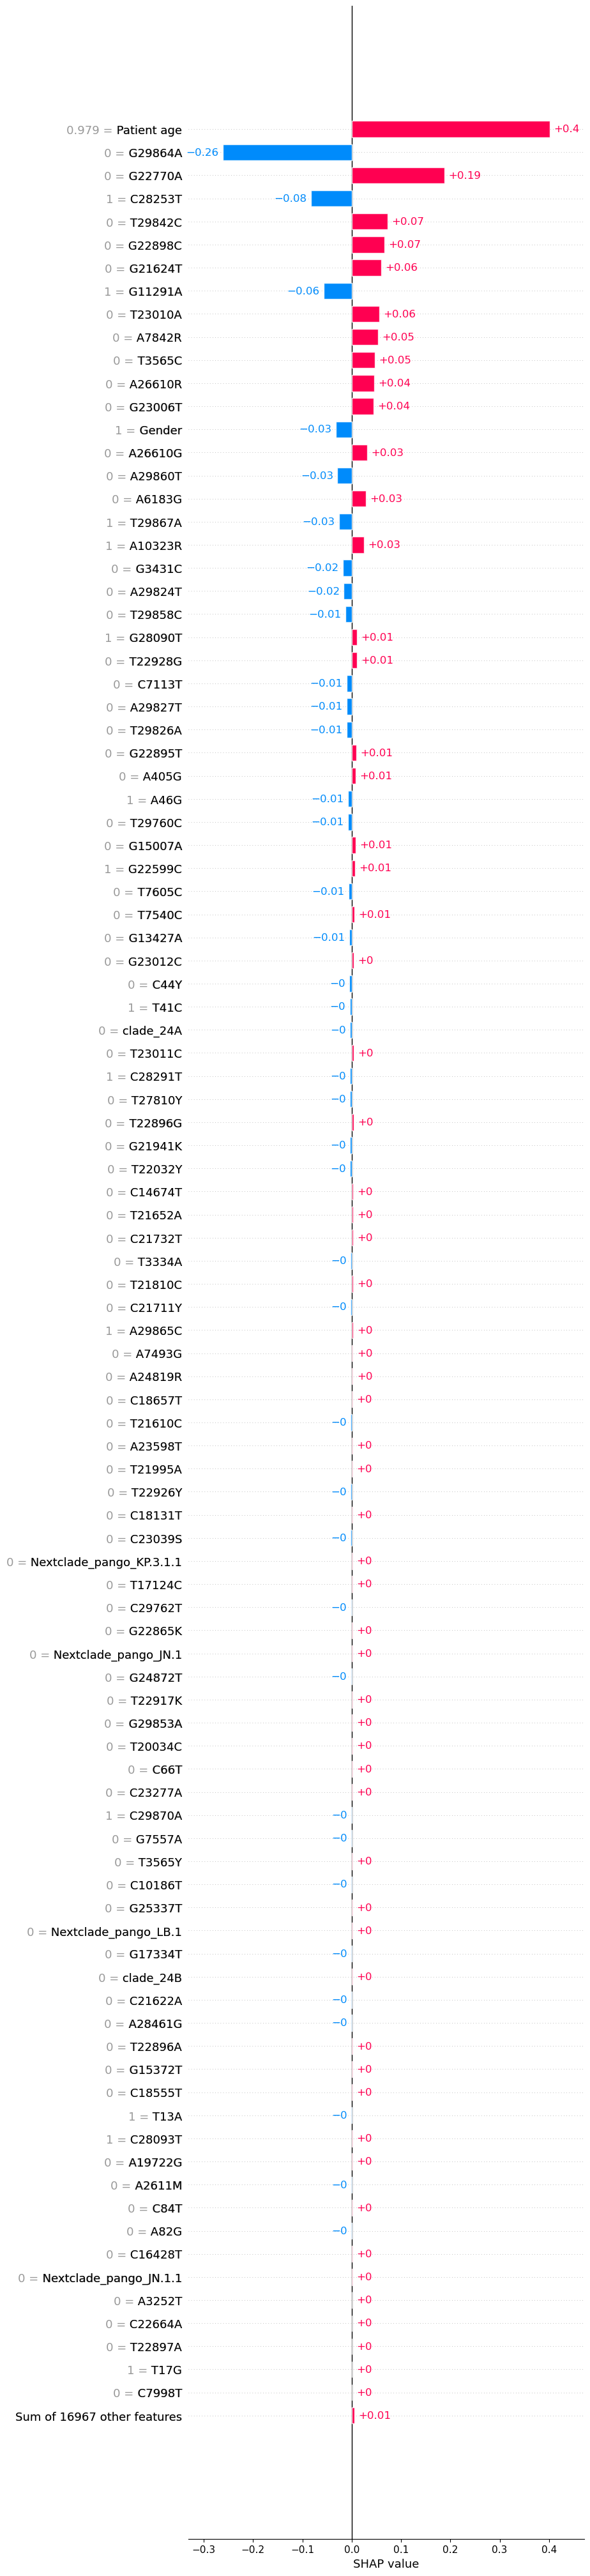

In [68]:
shap.plots.bar(shap_values_severe_correct[597], max_display=100) #80 FEMALE 

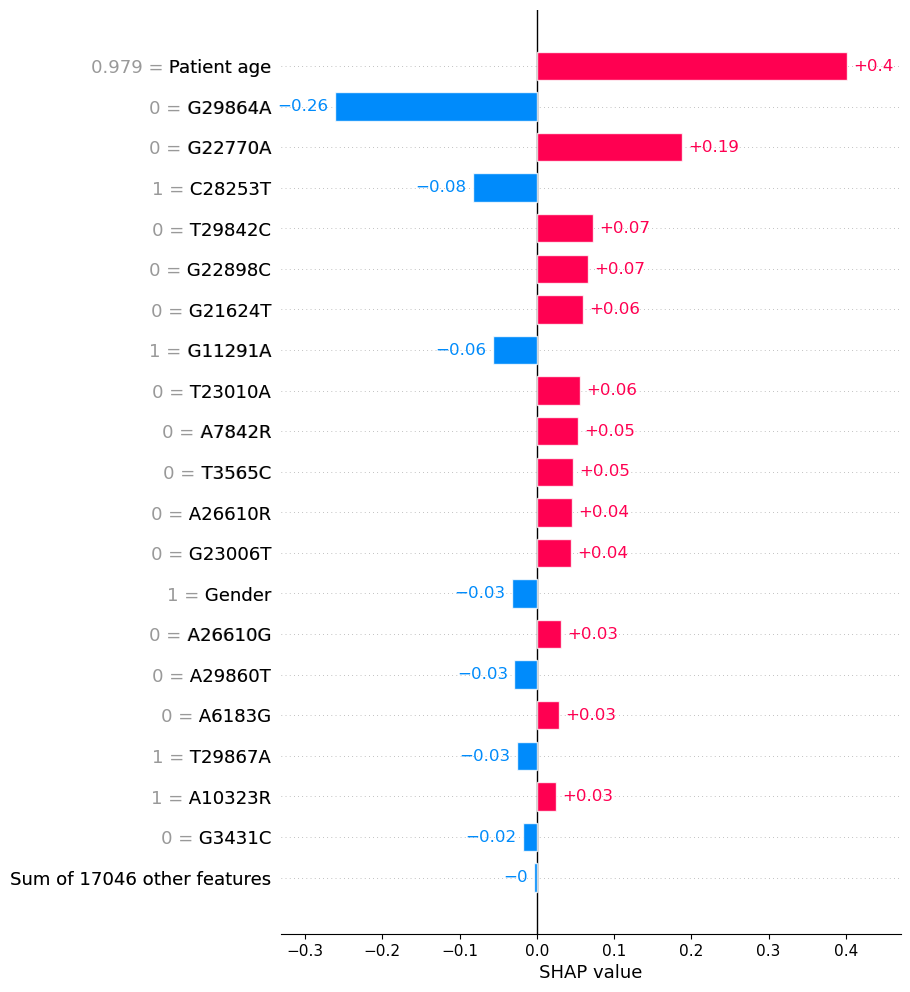

In [69]:
shap.plots.bar(shap_values_severe_correct[597], max_display=21, show=False)
plt.savefig("shap_bar_sample_597final.tiff", format='tiff', dpi=600, bbox_inches='tight')
plt.show()